# Presentation: Statistical Learning Course 
### Name: ONOJA Anthony PhD Data Science, Scuola Normale Superiore, Pisa, Italy

## Introduction
The dataset contains seven major variables that will be having an impact on whether someone has coronavirus disease or not, the description of each variable are as follows,
Country: List of countries person visited.
Age: Classification of the age group for each person, based on WHO Age Group Standard
Symptoms: According to WHO, 5 are major symptoms of COVID-19, Fever, Tiredness, Difficulty in breathing, Dry cough, and sore throat.
Experience any other symptoms: Pains, Nasal Congestion, Runny Nose, Diarrhea and Other.
Severity: The level of severity, Mild, Moderate, Severe
Contact: Has the person contacted some other COVID-19 Patient

### Learning objective: 
The aim of this study is to predict the risk an individual from contracting coronavirus (COVID-19) based on developed symptoms and activities  

#### Importing necessary libraries

In [1]:
# Import all the necessary libraries for the analysis 

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
import scipy

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Getting the dataset
df = pd.read_csv("data_symptoms_only.csv")

### Data Exploration/Analysis of the dataset

In [3]:
df.head(4)

,age,sex,city,province,country,fever,cough,throat-sore,fatigue,pnemonia,...,respiratory discomfort,dyspnea,weakness,shortness of breath,nausea,diarrhea,myalgia,joint pain,vomiting,rhinorrhoea
0,30.0,male,"Chaohu City, Hefei City",Anhui,China,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,47.0,male,"Baohe District, Hefei City",Anhui,China,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,49.0,male,"High-Tech Zone, Hefei City",Anhui,China,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes
3,47.0,female,"High-Tech Zone, Hefei City",Anhui,China,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [4]:
print(df.size)
print(df.shape)

9975
(399, 25)


In [5]:
print(df.columns)

Index(['age', 'sex', 'city', 'province', 'country', 'fever', 'cough',
       'throat-sore', 'fatigue', 'pnemonia', 'headache', 'chill', 'runny-nose',
       'chest-pain', 'malaise', 'respiratory discomfort', 'dyspnea',
       'weakness', 'shortness of breath', 'nausea', 'diarrhea', 'myalgia',
       'joint pain', 'vomiting', 'rhinorrhoea'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                       372 non-null float64
sex                       376 non-null object
city                      330 non-null object
province                  340 non-null object
country                   394 non-null object
fever                     399 non-null object
cough                     394 non-null object
throat-sore               398 non-null object
fatigue                   397 non-null object
pnemonia                  399 non-null object
headache                  398 non-null object
chill                     392 non-null object
runny-nose                311 non-null object
chest-pain                286 non-null object
malaise                   384 non-null object
respiratory discomfort    397 non-null object
dyspnea                   318 non-null object
weakness                  394 non-null object
shortness of breath       333 non-null object
nausea              

In [7]:
# check for missing values 
df.describe()

,age
count,372.000000
mean,45.741935
std,16.860233
min,2.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,89.000000


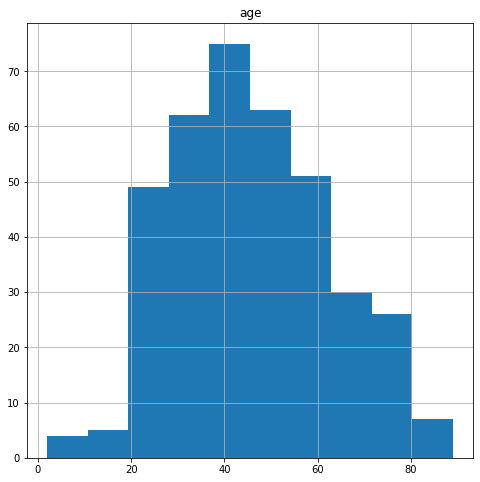

In [8]:
# Visually the dataset by plotting histogram
df.hist(figsize=(8,8))
plt.show()

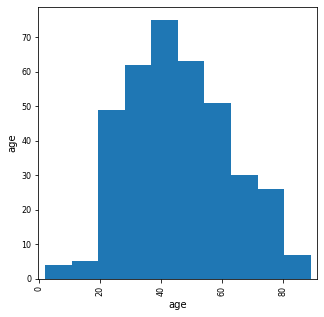

In [9]:
# plot some variables using scatter plot to visualize 
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(df[['age']],figsize=(5,5))
plt.show()

In [10]:
# Checking for missing observations 

df.isnull().any()

age                        True
sex                        True
city                       True
province                   True
country                    True
fever                     False
cough                      True
throat-sore                True
fatigue                    True
pnemonia                  False
headache                   True
chill                      True
runny-nose                 True
chest-pain                 True
malaise                    True
respiratory discomfort     True
dyspnea                    True
weakness                   True
shortness of breath        True
nausea                     True
diarrhea                   True
myalgia                    True
joint pain                 True
vomiting                   True
rhinorrhoea                True
dtype: bool

In [11]:
# Checking the distribution of categorical features in the dataset 

df.describe(include=['O'])

,sex,city,province,country,fever,cough,throat-sore,fatigue,pnemonia,headache,...,respiratory discomfort,dyspnea,weakness,shortness of breath,nausea,diarrhea,myalgia,joint pain,vomiting,rhinorrhoea
count,376,330,340,394,399,394,398,397,399,398,...,397,318,394,333,322,292,292,357,329,253
unique,2,162,70,26,3,3,4,3,3,3,...,3,3,2,3,3,3,3,3,2,3
top,male,Beijing,Anhui,China,Yes,No,Maybe,No,Yes,Yes,...,Yes,No,Yes,Yes,No,Yes,No,Maybe,No,No
freq,209,23,55,170,301,195,201,165,166,305,...,242,190,317,181,223,162,176,227,294,168


In [12]:
# filling missing values in categorical columns of the dataset: 

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['province'] = df['province'].fillna(df['province'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cough'] = df['cough'].fillna(df['cough'].mode()[0])
df['throat-sore'] = df['throat-sore'].fillna(df['throat-sore'].mode()[0])
df['fatigue'] = df['fatigue'].fillna(df['fatigue'].mode()[0])
df['headache'] = df['headache'].fillna(df['headache'].mode()[0])
df['chill'] = df['chill'].fillna(df['chill'].mode()[0])
df['runny-nose'] = df['runny-nose'].fillna(df['runny-nose'].mode()[0])
df['chest-pain'] = df['chest-pain'].fillna(df['chest-pain'].mode()[0])
df['malaise'] = df['malaise'].fillna(df['malaise'].mode()[0])
df['respiratory discomfort'] = df['respiratory discomfort'].fillna(df['respiratory discomfort'].mode()[0])
df['dyspnea'] = df['dyspnea'].fillna(df['dyspnea'].mode()[0])
df['weakness'] = df['weakness'].fillna(df['weakness'].mode()[0])
df['shortness of breath'] = df['shortness of breath'].fillna(df['shortness of breath'].mode()[0])
df['nausea'] = df['nausea'].fillna(df['nausea'].mode()[0])
df['diarrhea'] = df['diarrhea'].fillna(df['diarrhea'].mode()[0])
df['myalgia'] = df['myalgia'].fillna(df['myalgia'].mode()[0])
df['joint pain'] = df['joint pain'].fillna(df['joint pain'].mode()[0])
df['vomiting'] = df['vomiting'].fillna(df['vomiting'].mode()[0])
df['rhinorrhoea'] = df['rhinorrhoea'].fillna(df['rhinorrhoea'].mode()[0])

In [13]:
# Filling Missing observations in Continuous variables in the dataset:

df['age'].fillna(df['age'].mean(), inplace=True)

In [14]:
# Converting categorical variables to unique integers in the dataset df

sex_locs = sorted(df['sex'].unique())
sex_locs_mapping = dict(zip(sex_locs, range(0, len(sex_locs) + 1)))
sex_locs_mapping
df['sex'] = df['sex'].map(sex_locs_mapping).astype(int)

city_locs = sorted(df['city'].unique())
city_locs_mapping = dict(zip(city_locs, range(0, len(city_locs) + 1)))
city_locs_mapping
df['city'] = df['city'].map(city_locs_mapping).astype(int)

province_locs = sorted(df['province'].unique())
province_locs_mapping = dict(zip(province_locs, range(0, len(province_locs) + 1)))
province_locs_mapping
df['province'] = df['province'].map(province_locs_mapping).astype(int)

cough_locs = sorted(df['cough'].unique())
cough_locs_mapping = dict(zip(cough_locs, range(0, len(cough_locs) + 1)))
cough_locs_mapping
df['cough'] = df['cough'].map(cough_locs_mapping).astype(int)

throat_locs = sorted(df['throat-sore'].unique())
throat_locs_mapping = dict(zip(throat_locs, range(0, len(throat_locs) + 1)))
throat_locs_mapping
df['throat-sore'] = df['throat-sore'].map(throat_locs_mapping).astype(int)

fatigue_locs = sorted(df['fatigue'].unique())
fatigue_locs_mapping = dict(zip(fatigue_locs, range(0, len(fatigue_locs) + 1)))
fatigue_locs_mapping
df['fatigue'] = df['fatigue'].map(fatigue_locs_mapping).astype(int)

headache_locs = sorted(df['headache'].unique())
headache_locs_mapping = dict(zip(headache_locs, range(0, len(headache_locs) + 1)))
headache_locs_mapping
df['headache'] = df['headache'].map(headache_locs_mapping).astype(int)

chill_locs = sorted(df['chill'].unique())
chill_locs_mapping = dict(zip(chill_locs, range(0, len(chill_locs) + 1)))
chill_locs_mapping
df['chill'] = df['chill'].map(chill_locs_mapping).astype(int)

runny_locs = sorted(df['runny-nose'].unique())
runny_locs_mapping = dict(zip(runny_locs, range(0, len(runny_locs) + 1)))
runny_locs_mapping
df['runny-nose'] = df['runny-nose'].map(runny_locs_mapping).astype(int)

chest_locs = sorted(df['chest-pain'].unique())
chest_locs_mapping = dict(zip(chest_locs, range(0, len(chest_locs) + 1)))
chest_locs_mapping
df['chest-pain'] = df['chest-pain'].map(chest_locs_mapping).astype(int)

malaise_locs = sorted(df['malaise'].unique())
malaise_locs_mapping = dict(zip(malaise_locs, range(0, len(malaise_locs) + 1)))
malaise_locs_mapping
df['malaise'] = df['malaise'].map(malaise_locs_mapping).astype(int)

respiratory_locs = sorted(df['respiratory discomfort'].unique())
respiratory_locs_mapping = dict(zip(respiratory_locs, range(0, len(respiratory_locs) + 1)))
respiratory_locs_mapping
df['respiratory discomfort'] = df['respiratory discomfort'].map(respiratory_locs_mapping).astype(int)

dyspnea_locs = sorted(df['dyspnea'].unique())
dyspnea_locs_mapping = dict(zip(dyspnea_locs, range(0, len(dyspnea_locs) + 1)))
dyspnea_locs_mapping
df['dyspnea'] = df['dyspnea'].map(dyspnea_locs_mapping).astype(int)

weakness_locs = sorted(df['weakness'].unique())
weakness_locs_mapping = dict(zip(weakness_locs, range(0, len(weakness_locs) + 1)))
weakness_locs_mapping
df['weakness'] = df['weakness'].map(weakness_locs_mapping).astype(int)

shortness_locs = sorted(df['shortness of breath'].unique())
shortness_locs_mapping = dict(zip(shortness_locs, range(0, len(shortness_locs) + 1)))
shortness_locs_mapping
df['shortness of breath'] = df['shortness of breath'].map(shortness_locs_mapping).astype(int)

nausea_locs = sorted(df['nausea'].unique())
nausea_locs_mapping = dict(zip(nausea_locs, range(0, len(nausea_locs) + 1)))
nausea_locs_mapping
df['nausea'] = df['nausea'].map(nausea_locs_mapping).astype(int)

diarrhea_locs = sorted(df['diarrhea'].unique())
diarrhea_locs_mapping = dict(zip(diarrhea_locs, range(0, len(diarrhea_locs) + 1)))
diarrhea_locs_mapping
df['diarrhea'] = df['diarrhea'].map(diarrhea_locs_mapping).astype(int)

myalgia_locs = sorted(df['myalgia'].unique())
myalgia_locs_mapping = dict(zip(myalgia_locs, range(0, len(myalgia_locs) + 1)))
myalgia_locs_mapping
df['myalgia'] = df['myalgia'].map(myalgia_locs_mapping).astype(int)

joint_locs = sorted(df['joint pain'].unique())
joint_locs_mapping = dict(zip(joint_locs, range(0, len(joint_locs) + 1)))
joint_locs_mapping
df['joint pain'] = df['joint pain'].map(joint_locs_mapping).astype(int)

vomiting_locs = sorted(df['vomiting'].unique())
vomiting_locs_mapping = dict(zip(vomiting_locs, range(0, len(vomiting_locs) + 1)))
vomiting_locs_mapping
df['vomiting'] = df['vomiting'].map(vomiting_locs_mapping).astype(int)

rhinorrhoea_locs = sorted(df['rhinorrhoea'].unique())
rhinorrhoea_locs_mapping = dict(zip(rhinorrhoea_locs, range(0, len(rhinorrhoea_locs) + 1)))
rhinorrhoea_locs_mapping
df['rhinorrhoea'] = df['rhinorrhoea'].map(rhinorrhoea_locs_mapping).astype(int)

fever_locs = sorted(df['fever'].unique())
fever_locs_mapping = dict(zip(fever_locs, range(0, len(fever_locs) + 1)))
fever_locs_mapping
df['fever'] = df['fever'].map(fever_locs_mapping).astype(int)


pnemonia_locs = sorted(df['pnemonia'].unique())
pnemonia_locs_mapping = dict(zip(pnemonia_locs, range(0, len(pnemonia_locs) + 1)))
pnemonia_locs_mapping
df['pnemonia'] = df['pnemonia'].map(pnemonia_locs_mapping).astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                       399 non-null float64
sex                       399 non-null int32
city                      399 non-null int32
province                  399 non-null int32
country                   399 non-null object
fever                     399 non-null int32
cough                     399 non-null int32
throat-sore               399 non-null int32
fatigue                   399 non-null int32
pnemonia                  399 non-null int32
headache                  399 non-null int32
chill                     399 non-null int32
runny-nose                399 non-null int32
chest-pain                399 non-null int32
malaise                   399 non-null int32
respiratory discomfort    399 non-null int32
dyspnea                   399 non-null int32
weakness                  399 non-null int32
shortness of breath       399 non-null int32
nausea                    399 non-nul

In [16]:
# We want to know how well does each feature correlate with the dependent variable
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,age,sex,city,province,fever,cough,throat-sore,fatigue,pnemonia,headache,...,respiratory discomfort,dyspnea,weakness,shortness of breath,nausea,diarrhea,myalgia,joint pain,vomiting,rhinorrhoea
age,1.000000,0.027025,-0.070163,0.072513,-0.004459,-0.045336,-0.096214,-0.037306,-0.052136,-0.088688,...,-0.109484,-0.023764,-0.092805,-0.006361,0.007651,0.062266,0.008030,-0.010834,-0.025349,0.055852
sex,0.027025,1.000000,0.007565,0.042341,0.073765,-0.006812,-0.026495,-0.056849,0.020602,-0.001952,...,-0.049992,-0.058961,-0.054430,0.036930,0.092672,0.012213,0.013106,-0.002568,0.011658,0.021001
city,-0.070163,0.007565,1.000000,0.136295,0.013969,-0.012102,-0.023991,-0.040385,0.010777,0.024289,...,0.026546,-0.020828,-0.017903,0.026178,-0.163055,0.095696,-0.139235,-0.026919,-0.031217,-0.046502
province,0.072513,0.042341,0.136295,1.000000,0.036080,0.077209,-0.001154,-0.085242,0.126948,0.133644,...,0.078846,-0.097553,0.042511,0.121956,-0.014180,0.099954,-0.181710,-0.086338,-0.158700,-0.207083
fever,-0.004459,0.073765,0.013969,0.036080,1.000000,0.070281,0.098633,0.024798,0.040337,0.046200,...,0.051810,0.050551,0.072669,0.039235,0.033687,0.062936,0.027504,0.048384,0.052345,0.054960
cough,-0.045336,-0.006812,-0.012102,0.077209,0.070281,1.000000,0.733671,0.251625,0.745199,0.520519,...,0.646882,-0.163607,0.523395,0.128098,-0.031881,0.115862,0.181425,0.172860,0.323241,-0.028312
throat-sore,-0.096214,-0.026495,-0.023991,-0.001154,0.098633,0.733671,1.000000,0.266681,0.599713,0.462658,...,0.694953,0.020341,0.441546,-0.048077,-0.033958,-0.048931,0.145449,0.093129,0.326568,0.048911
fatigue,-0.037306,-0.056849,-0.040385,-0.085242,0.024798,0.251625,0.266681,1.000000,0.453627,-0.158937,...,0.342521,0.110962,-0.069756,0.339651,0.084878,0.162574,0.560910,0.457021,0.331119,0.171926
pnemonia,-0.052136,0.020602,0.010777,0.126948,0.040337,0.745199,0.599713,0.453627,1.000000,0.256001,...,0.588403,-0.085789,0.192175,0.165603,-0.032765,0.128083,0.249393,0.252899,0.327505,-0.028686
headache,-0.088688,-0.001952,0.024289,0.133644,0.046200,0.520519,0.462658,-0.158937,0.256001,1.000000,...,0.549042,-0.057179,0.782236,0.039559,-0.021651,-0.110222,-0.068846,0.002616,0.158886,-0.013917


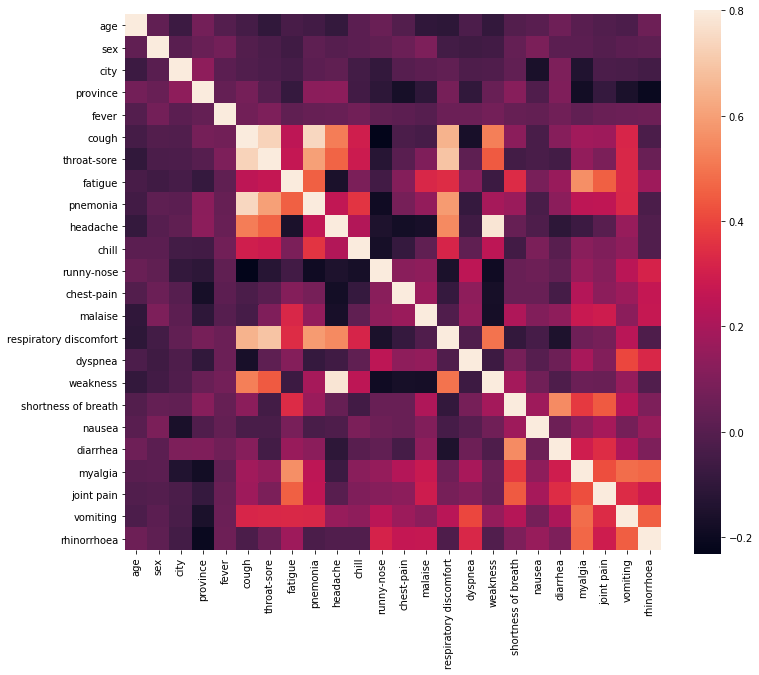

In [17]:
# Correlation matrix
import seaborn as sns

correlation_matrix = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix,vmax = 0.8, square = True)
plt.show()

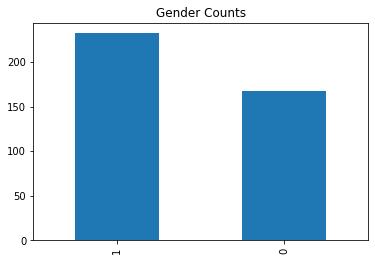

In [18]:
df['sex'].value_counts()
df['sex'].value_counts()
df['sex'].value_counts().plot(kind='bar', 
                                   title='Gender Counts')
plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

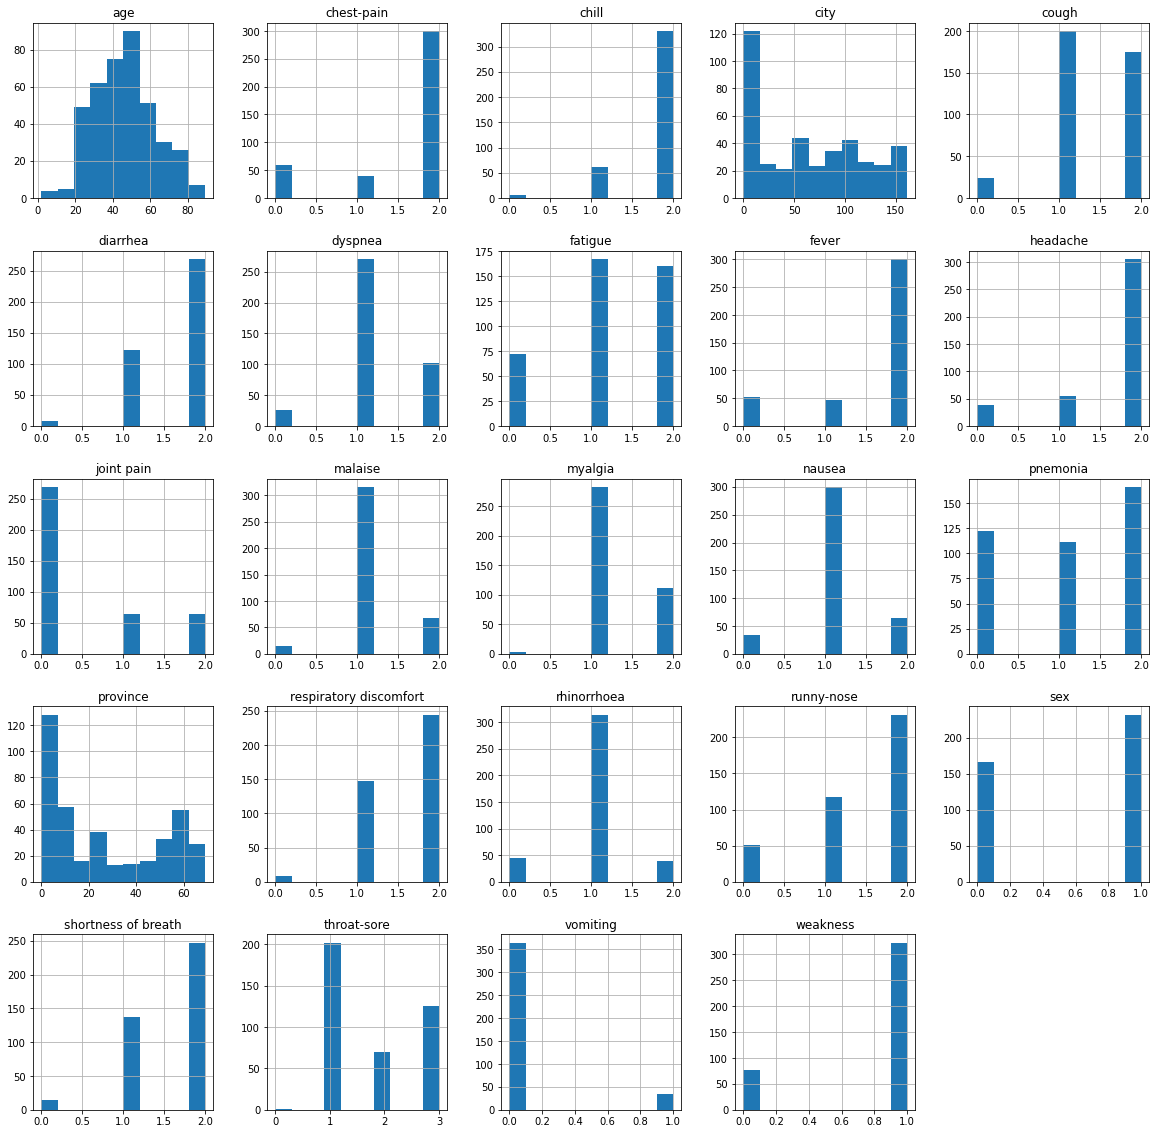

In [19]:
# Visually the dataset by plotting histogram
df.hist(figsize=(20,20))
plt.show()

### Perform Dimension reduction using the Principal Component Analysis on the Dataset 

In [20]:
#df.info()

In [21]:
from sklearn.preprocessing import StandardScaler
features = ['age', 'city', 'province', 'fever', 'cough',
       'throat-sore', 'fatigue', 'pnemonia', 'headache', 'chill', 'runny-nose',
       'chest-pain', 'malaise', 'respiratory discomfort', 'dyspnea',
       'weakness', 'shortness of breath', 'nausea', 'diarrhea', 'myalgia',
       'joint pain', 'vomiting', 'rhinorrhoea']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['sex']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)


In [22]:
df['sex'].replace(0, 'Female',inplace=True)
df['sex'].replace(1, 'Male',inplace=True)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [24]:
finalDf = pd.concat([principalDf, df[['sex']]], axis = 1)

In [25]:
finalDf.head()
finalDf.tail()

,principal component 1,principal component 2,sex
394,-2.747924,0.810547,Male
395,-2.004049,0.580561,Female
396,-2.481913,1.171924,Female
397,-1.814329,1.061478,Male
398,-1.140582,0.413091,Male


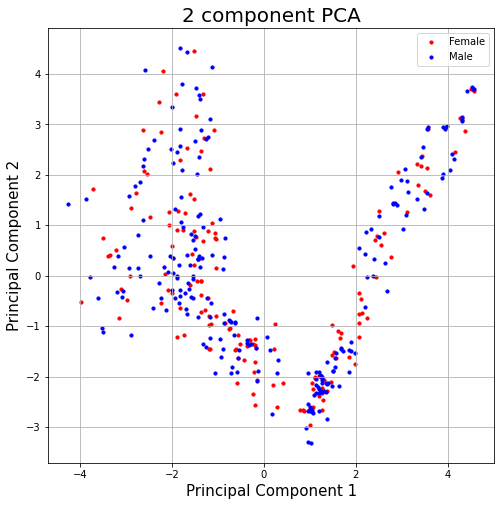

In [26]:
# Visualization of the PCA 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Female', 'Male']
colors = ['r', 'b']
for sex, color in zip(targets,colors):
    indicesToKeep = finalDf['sex'] == sex
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

## Unsupervised Learning Classifications of the Dataset 

#### The following Unsupervised Machine Learning classfication approaches were considered in the classification of the dataset:
- K-means Clustering 
- Hierachical Clustering 
- DBSCAN

#### The Algorithms to be used were:
- Euclidean Distance 
- Algglomerative Clustering
- Apirori
- Density Based Approach 

### K-Means

#### Objective: To clusters the dataset into 𝑘 groups

In [27]:
# import the necessary packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

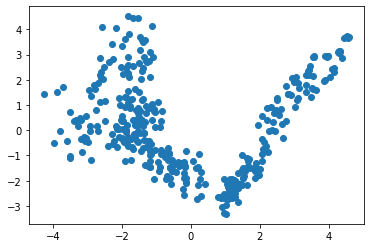

In [28]:
# Visualize true data points before the applications of K-means clustering 
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], label='True Position')

In [29]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(principalDf)

In [30]:
km.labels_[:5]

array([2, 2, 2, 2, 2])

In [31]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([168, 161,  70], dtype=int64))

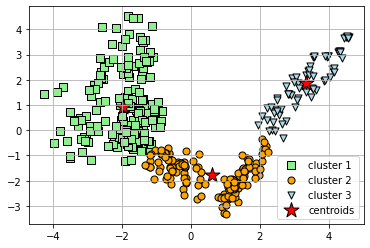

In [32]:
# plot the 3 clusters
plt.scatter(
    principalDf.iloc[y_km == 0, 0], principalDf.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1')

plt.scatter(
    principalDf.iloc[y_km == 1, 0], principalDf.iloc[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2')

plt.scatter(
    principalDf.iloc[y_km == 2, 0], principalDf.iloc[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3')

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

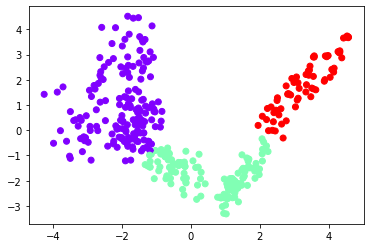

In [33]:
# Visualize the data points after applying the k-means clustering  
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')

In [34]:
# Performing Centering of the k-means 
km.cluster_centers_

array([[-1.98178963,  0.93042329],
       [ 0.61252347, -1.78755679],
       [ 3.34749113,  1.87836473]])

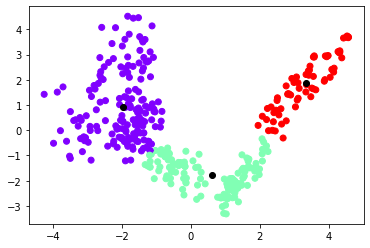

In [35]:
# Visualising the clusters after centering 
#Plot the centroid. This time we're going to use the cluster centres  

plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')

In [36]:
# Determining the exact cluster number using the silhouette elbow approach 

print('SSE %s' % km.inertia_)
print('Silhouette %s' % silhouette_score(principalDf, km.labels_))

SSE 757.5250941072701
Silhouette 0.5526770123297072


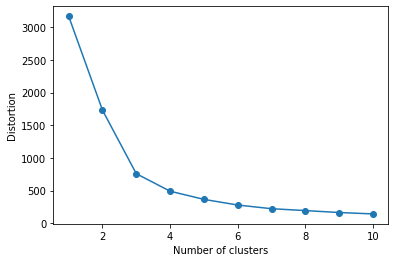

In [37]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(principalDf)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Hierarchical Clustering of the dataset

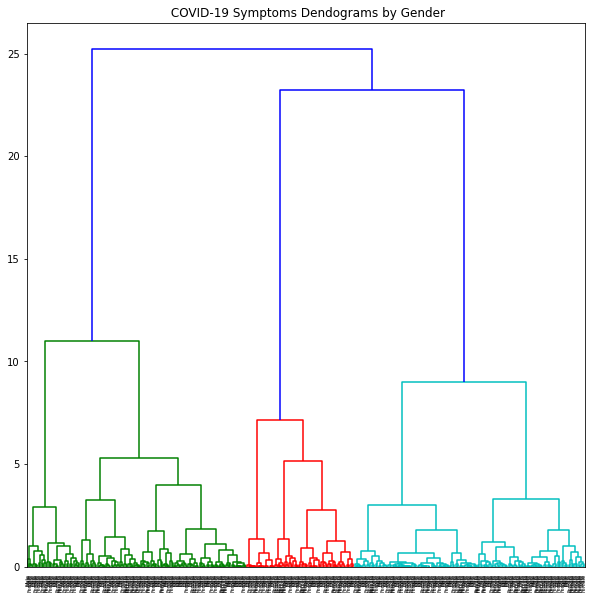

In [38]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

# Standardizing the features
X = StandardScaler().fit_transform(principalDf)

plt.figure(figsize=(10, 10))
plt.title(" COVID-19 Symptoms Dendograms by Gender")
dend = shc.dendrogram(shc.linkage(X, method='ward'), labels=list(finalDf.sex))

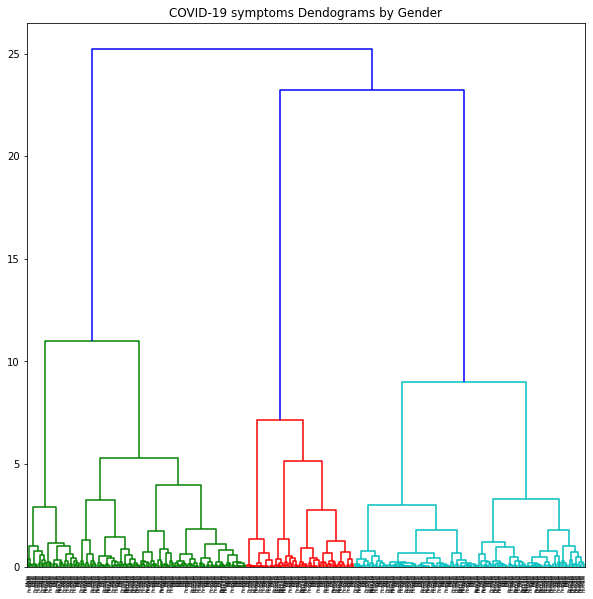

In [39]:
plt.figure(figsize=(10, 10))
plt.title("COVID-19 symptoms Dendograms by Gender")
dend = shc.dendrogram(shc.linkage(X, method='ward'), labels=list(finalDf.sex))

In [40]:
### Algglormerative clustering approach 

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

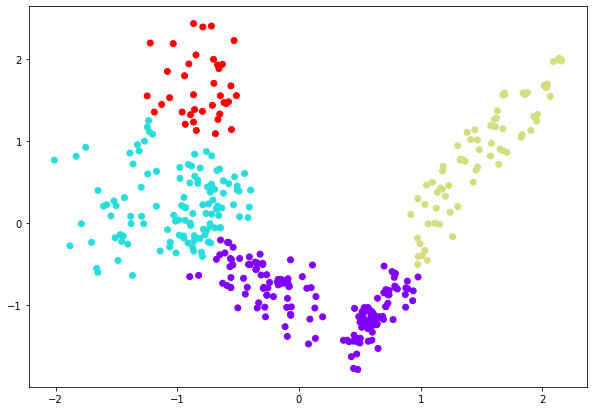

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

### Density-Based Spatial Clustering of Applications (DBSCA)

In [42]:
import numpy as np
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Standardizing the features
X = StandardScaler().fit_transform(principalDf)

In [43]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

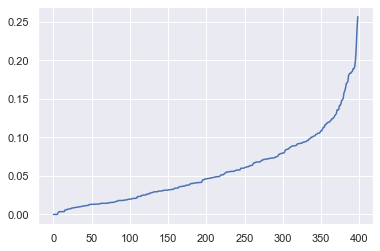

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [45]:
m = DBSCAN(eps=0.20, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [46]:
clusters = m.labels_
# Labels, note: noisy samples are given by the label -1
m.labels_[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [47]:
# A look at the size of the clusters
np.unique(m.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([ 27,   7,  13,  47,   3,  94, 153,  17,  10,  23,   5], dtype=int64))

In [48]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

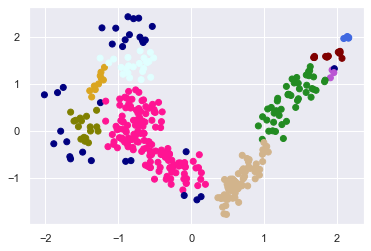

In [49]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

#### Knee Method to estimate the best eps

In [50]:
from scipy.spatial.distance import pdist, squareform

In [51]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.31664414 0.64249396 0.02859856 ... 0.32056128 0.75328304 0.47211321]

[[0.         0.31664414 0.64249396 ... 3.59611705 3.33133609 3.22358788]
 [0.31664414 0.         0.38602611 ... 3.38293227 3.10644391 2.96891568]
 [0.64249396 0.38602611 0.         ... 2.99707907 2.72052323 2.58933245]
 ...
 [3.59611705 3.38293227 2.99707907 ... 0.         0.32056128 0.75328304]
 [3.33133609 3.10644391 2.72052323 ... 0.32056128 0.         0.47211321]
 [3.22358788 2.96891568 2.58933245 ... 0.75328304 0.47211321 0.        ]]


In [52]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

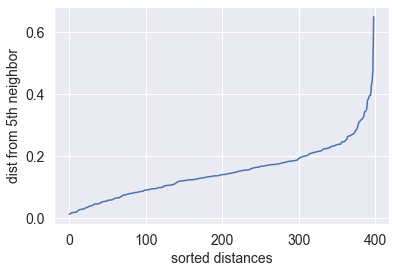

In [53]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=14)
plt.xlabel('sorted distances', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()